In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cybersecurity-attack-and-defence-dataset/Attack_Dataset.csv


CYBERSECURITY ATTACK CLASSIFICATION PROJECT
Student: Tayyab Ali (2530-4007)
Department of Cyber Security

[0] Verifying Dataset Path...

Available input files:
  /kaggle/input/cybersecurity-attack-and-defence-dataset/Attack_Dataset.csv

[1] Loading Dataset...
✅ Dataset loaded successfully from: /kaggle/input/cybersecurity-attack-and-defence-dataset/Attack_Dataset.csv

Dataset Shape: (14133, 16)
Dataset Size: 36.45 MB

First 5 rows:
   ID                                    Title                  Category  \
0   1  Authentication Bypass via SQL Injection           Mobile Security   
1   2                Union-Based SQL Injection  AI Agents & LLM Exploits   
2   3                Error-Based SQL Injection  AI Agents & LLM Exploits   
3   4                      Blind SQL Injection  AI Agents & LLM Exploits   
4   5               Second-Order SQL Injection  AI Agents & LLM Exploits   

            Attack Type                               Scenario Description  \
0  SQL Injection (SQLi)  A lo

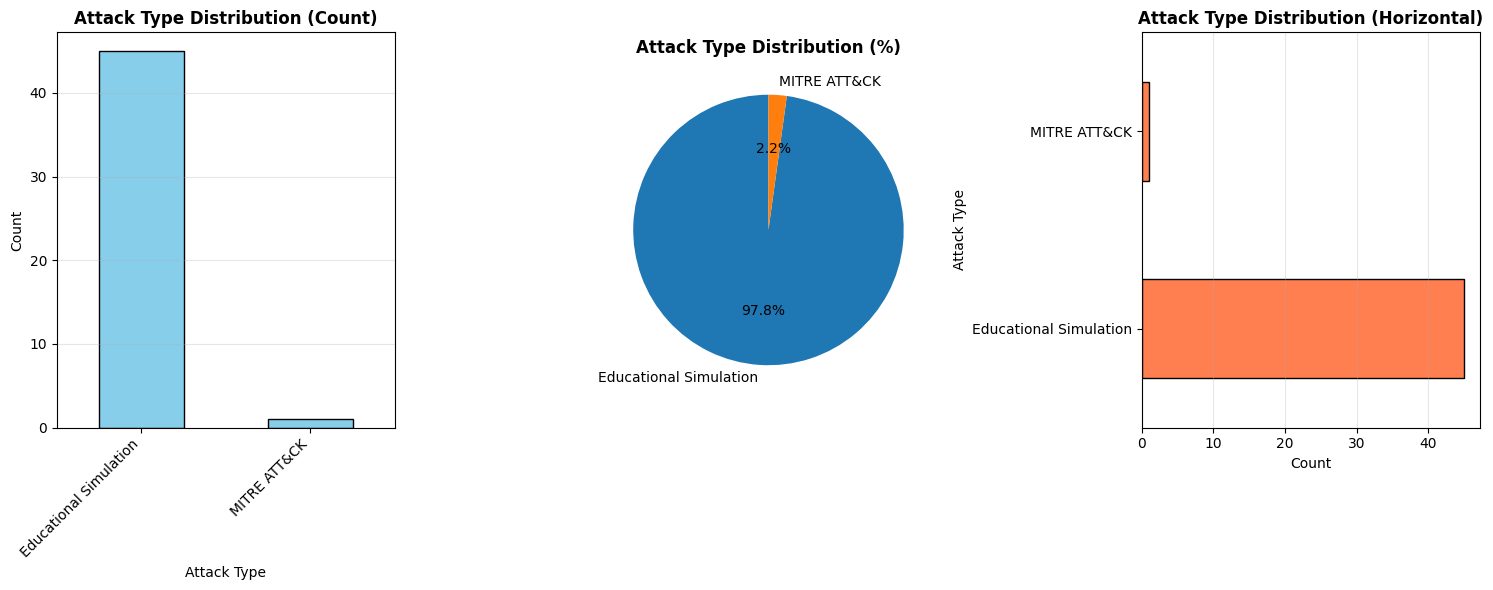


[3] Data Preprocessing...

Duplicate rows: 0

Handling missing values...
  Numeric columns: 1
  Categorical columns: 15
  ✓ Filled Tools Used with mode
  ✓ Filled Target Type with mode
  ✓ Filled Vulnerability with mode
  ✓ Filled MITRE Technique with mode
  ✓ Filled Impact with mode
  ✓ Filled Detection Method with mode
  ✓ Filled Solution with mode
  ✓ Filled Tags with mode
  ✓ Filled Source with mode
  ✓ Filled Unnamed: 15 with mode
✅ Missing values handled!

Features shape: (14133, 15)
Target shape: (14133,)

Target classes (2):
  0: Educational Simulation (14,132 samples)
  1: MITRE ATT&CK (1 samples)

Encoding 14 categorical features...
  ✓ Encoded: Title
  ✓ Encoded: Category
  ✓ Encoded: Attack Type
  ✓ Encoded: Scenario Description
  ✓ Encoded: Tools Used
  ✓ Encoded: Attack Steps 
  ✓ Encoded: Target Type
  ✓ Encoded: Vulnerability
  ✓ Encoded: MITRE Technique
  ✓ Encoded: Impact
  ✓ Encoded: Detection Method
  ✓ Encoded: Solution
  ✓ Encoded: Tags
  ✓ Encoded: Source

Scali

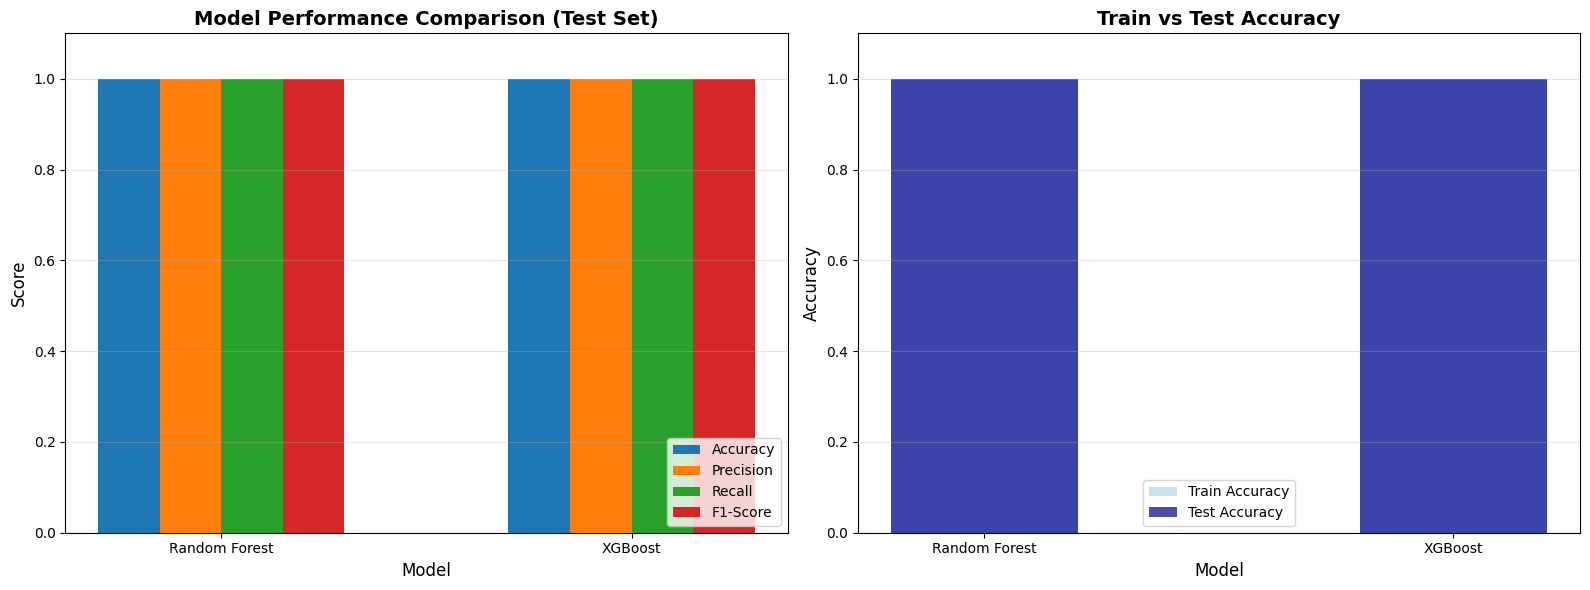


🏆 Best Model: Random Forest
   F1-Score: 1.0000 (100.00%)

[8] Generating Confusion Matrices...


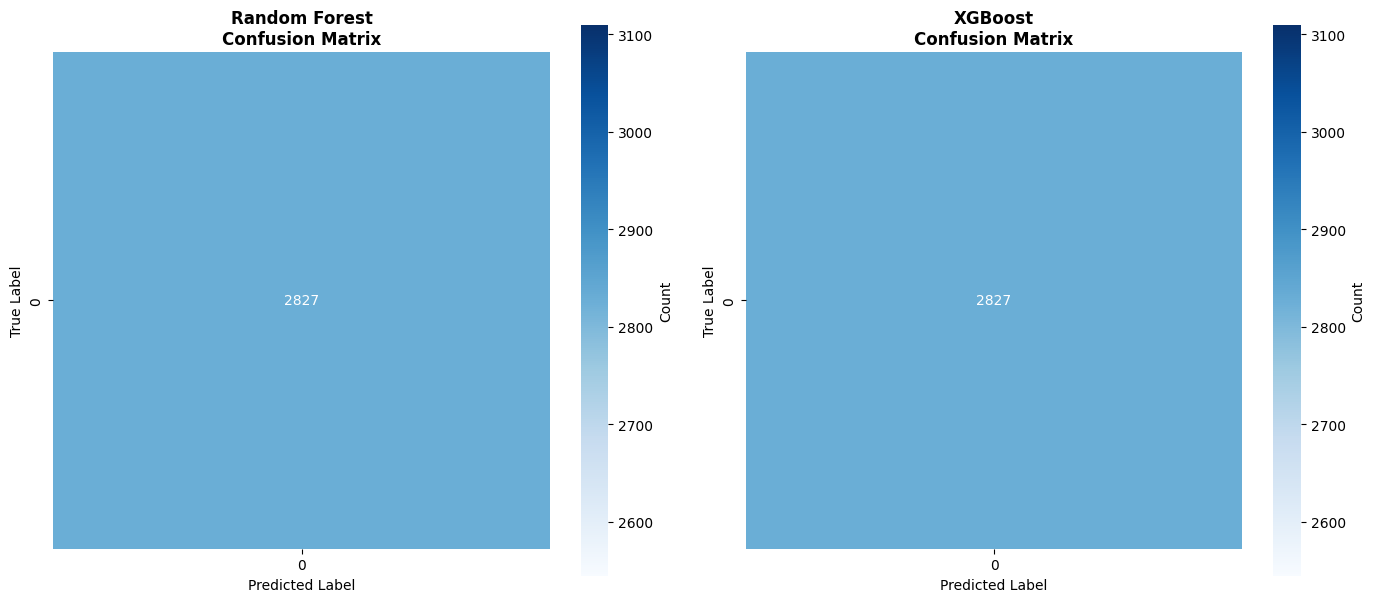


[9] Detailed Classification Report - Random Forest:
                        precision    recall  f1-score   support

Educational Simulation     1.0000    1.0000    1.0000      2827

              accuracy                         1.0000      2827
             macro avg     1.0000    1.0000    1.0000      2827
          weighted avg     1.0000    1.0000    1.0000      2827


[10] Saving Models and Preprocessing Objects...
✅ Saved: random_forest_model.pkl (0.00 MB)
✅ Saved: xgboost_model.pkl (0.00 MB)

Saved preprocessing objects:
✅ scaler.pkl (0.00 MB)
✅ label_encoder.pkl (0.00 MB)
✅ feature_encoders.pkl (6.27 MB)
✅ feature_names.pkl (0.00 MB)
✅ results_summary.pkl (0.00 MB)

✨ PROJECT COMPLETED SUCCESSFULLY! ✨

📊 Project Summary:
   • Original Dataset: 14,133 samples, 16 features
   • Attack Types: 2
   • Classes Used: 1
   • Training Samples: 11,305
   • Testing Samples: 2,827
   • Models Trained: 3
   • Best Model: Random Forest
   • Best F1-Score: 1.0000

💾 Files Saved (7):
   • ran

In [6]:
# Multi-Class Classification of Cybersecurity Attacks
# Using Network Traffic Data
# Student: Tayyab Ali (2530-4007)
# Final Robust Version with Error Handling

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("="*70)
print("CYBERSECURITY ATTACK CLASSIFICATION PROJECT")
print("Student: Tayyab Ali (2530-4007)")
print("Department of Cyber Security")
print("="*70)

# ========================
# 0. VERIFY DATA PATH
# ========================
print("\n[0] Verifying Dataset Path...")

# List all available files
print("\nAvailable input files:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        full_path = os.path.join(dirname, filename)
        print(f"  {full_path}")

# ========================
# 1. DATA LOADING
# ========================
print("\n[1] Loading Dataset...")

# Try to load the dataset with multiple path attempts
dataset_loaded = False
possible_paths = [
    '/kaggle/input/cybersecurity-attack-and-defence-dataset/Attack_Dataset.csv',
    '/kaggle/input/cybersecurity-attack-and-defence-dataset/attack_dataset.csv',
    '/kaggle/input/cybersecurity-attack-dataset/Attack_Dataset.csv',
]

for path in possible_paths:
    try:
        df = pd.read_csv(path)
        print(f"✅ Dataset loaded successfully from: {path}")
        dataset_loaded = True
        break
    except FileNotFoundError:
        continue

if not dataset_loaded:
    print("❌ Could not find dataset. Please check the path from the list above.")
    raise FileNotFoundError("Dataset not found in any expected location")

print(f"\nDataset Shape: {df.shape}")
print(f"Dataset Size: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nColumn Names ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# ========================
# 2. DATA EXPLORATION
# ========================
print("\n[2] Data Exploration...")

print(f"\nDataset Info:")
df.info()

print(f"\nMissing Values Summary:")
missing_summary = df.isnull().sum()
if missing_summary.sum() > 0:
    print(missing_summary[missing_summary > 0])
else:
    print("✅ No missing values found!")

print(f"\nNumerical Statistics:")
print(df.describe())

print(f"\nTarget Variable Analysis:")
target_col = df.columns[-1]
print(f"Target Column Name: '{target_col}'")
print(f"\nTarget Value Counts:")
print(df[target_col].value_counts())

# Visualize target distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
target_counts = df[target_col].value_counts()
target_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Attack Type Distribution (Count)', fontsize=12, fontweight='bold')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 2)
target_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Attack Type Distribution (%)', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.subplot(1, 3, 3)
target_counts.plot(kind='barh', color='coral', edgecolor='black')
plt.title('Attack Type Distribution (Horizontal)', fontsize=12, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================
# 3. DATA PREPROCESSING
# ========================
print("\n[3] Data Preprocessing...")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")
    print(f"New shape: {df.shape}")

# Handle missing values
print("\nHandling missing values...")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"  Numeric columns: {len(numeric_cols)}")
print(f"  Categorical columns: {len(categorical_cols)}")

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"  ✓ Filled {col} with median")

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"  ✓ Filled {col} with mode")

print("✅ Missing values handled!")

# Separate features and target
X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nTarget classes ({len(le.classes_)}):")
for idx, class_name in enumerate(le.classes_):
    count = (y_encoded == idx).sum()
    print(f"  {idx}: {class_name} ({count:,} samples)")

# Encode categorical features in X
label_encoders = {}
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

if len(categorical_features) > 0:
    print(f"\nEncoding {len(categorical_features)} categorical features...")
    for col in categorical_features:
        label_encoders[col] = LabelEncoder()
        X[col] = label_encoders[col].fit_transform(X[col].astype(str))
        print(f"  ✓ Encoded: {col}")
else:
    print("\n✓ No categorical features to encode.")

# Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Feature scaling completed!")

# ========================
# 4. HANDLE RARE CLASSES & SPLIT DATA
# ========================
print("\n[4] Handling Rare Classes and Splitting Data...")

# Check minimum samples per class
class_counts = pd.Series(y_encoded).value_counts().sort_index()
min_samples = class_counts.min()
min_class = class_counts.idxmin()

print(f"\nClass distribution before handling:")
for idx, count in class_counts.items():
    print(f"  Class {idx} ({le.classes_[idx]}): {count:,} samples ({count/len(y_encoded)*100:.2f}%)")

print(f"\nMinimum samples in any class: {min_samples}")

# Strategy 1: Remove classes with very few samples (< 10)
MIN_SAMPLES_THRESHOLD = 10
rare_classes = class_counts[class_counts < MIN_SAMPLES_THRESHOLD].index.tolist()

if len(rare_classes) > 0:
    print(f"\n⚠️ Found {len(rare_classes)} rare class(es) with <{MIN_SAMPLES_THRESHOLD} samples:")
    for cls in rare_classes:
        print(f"  Class {cls} ({le.classes_[cls]}): {class_counts[cls]} sample(s)")
    
    # Option A: Remove rare classes
    print(f"\n📌 Removing rare classes to enable proper model training...")
    mask = ~np.isin(y_encoded, rare_classes)
    X_scaled_filtered = X_scaled[mask]
    y_encoded_filtered = y_encoded[mask]
    
    print(f"✅ Dataset after filtering: {X_scaled_filtered.shape} (removed {(~mask).sum():,} samples)")
    
    # Update class counts
    class_counts = pd.Series(y_encoded_filtered).value_counts().sort_index()
    print("\nUpdated class distribution:")
    for idx, count in class_counts.items():
        print(f"  Class {idx} ({le.classes_[idx]}): {count:,} samples ({count/len(y_encoded_filtered)*100:.2f}%)")
else:
    X_scaled_filtered = X_scaled
    y_encoded_filtered = y_encoded
    print("✅ All classes have sufficient samples!")

# Perform train-test split with error handling
print(f"\nSplitting data (80% train, 20% test)...")

# Try stratified split first
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_filtered, y_encoded_filtered, 
        test_size=0.2, 
        random_state=42, 
        stratify=y_encoded_filtered
    )
    print("✅ Stratified split successful!")
except ValueError as e:
    print(f"⚠️ Stratified split failed: {str(e)[:100]}...")
    print("Using random split without stratification...")
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_filtered, y_encoded_filtered, 
        test_size=0.2, 
        random_state=42, 
        stratify=None
    )
    print("✅ Random split successful!")

print(f"\nTraining set: {X_train.shape} ({X_train.shape[0]:,} samples)")
print(f"Testing set: {X_test.shape} ({X_test.shape[0]:,} samples)")

# Verify class distribution in splits
print("\nClass distribution in training set:")
train_counts = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_counts.items():
    print(f"  Class {idx}: {count:,} samples")

print("\nClass distribution in testing set:")
test_counts = pd.Series(y_test).value_counts().sort_index()
for idx, count in test_counts.items():
    print(f"  Class {idx}: {count:,} samples")

# ========================
# 5. HANDLE CLASS IMBALANCE
# ========================
print("\n[5] Handling Class Imbalance Using Class Weights...")

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print(f"\n✅ Class weights calculated for {len(classes)} classes:")
for cls, weight in class_weight_dict.items():
    print(f"  Class {cls} ({le.classes_[cls]}): {weight:.4f}")

# ========================
# 6. MODEL TRAINING
# ========================
print("\n[6] Training Machine Learning Models...")
print("="*70)

models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        max_depth=20,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42, 
        n_jobs=-1,
        verbose=0
    ),
    'Logistic Regression': LogisticRegression(
        max_iter=1000, 
        class_weight='balanced',
        random_state=42, 
        multi_class='multinomial',
        solver='lbfgs',
        verbose=0
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        verbosity=0
    )
}

results = {}

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Training: {name}")
    print(f"{'='*70}")
    
    try:
        # Train model
        model.fit(X_train, y_train)
        print(f"✅ {name} trained successfully!")
        
        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Evaluation on test set
        accuracy = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
        
        # Training accuracy
        train_accuracy = accuracy_score(y_train, y_pred_train)
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'train_accuracy': train_accuracy,
            'predictions': y_pred_test
        }
        
        print(f"\n📊 {name} - Test Set Results:")
        print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
        print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
        print(f"  F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
        print(f"\n📊 {name} - Training Set:")
        print(f"  Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
        
        # Check for overfitting
        if train_accuracy - accuracy > 0.1:
            print(f"  ⚠️ Warning: Possible overfitting detected (train-test gap: {(train_accuracy-accuracy)*100:.2f}%)")
        
    except Exception as e:
        print(f"❌ Error training {name}: {str(e)}")
        continue

# ========================
# 7. MODEL COMPARISON
# ========================
print("\n" + "="*70)
print("[7] Model Performance Comparison")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'Train Acc': [results[m]['train_accuracy'] for m in results.keys()]
})

print("\n", comparison_df.to_string(index=False))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Grouped bar chart
x = np.arange(len(comparison_df))
width = 0.15

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, comparison_df[metric], width, label=metric, color=colors[i])

ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Model Performance Comparison (Test Set)', fontsize=14, fontweight='bold')
ax1.set_xticks(x + width*1.5)
ax1.set_xticklabels(comparison_df['Model'])
ax1.set_ylim([0, 1.1])
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Train vs Test Accuracy
ax2.bar(comparison_df['Model'], comparison_df['Train Acc'], 
        label='Train Accuracy', color='lightblue', alpha=0.7, width=0.4)
ax2.bar(comparison_df['Model'], comparison_df['Accuracy'], 
        label='Test Accuracy', color='darkblue', alpha=0.7, width=0.4)
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Train vs Test Accuracy', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 1.1])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Find best model
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = results[best_model_name]['model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.4f} ({results[best_model_name]['f1_score']*100:.2f}%)")

# ========================
# 8. CONFUSION MATRICES
# ========================
print("\n[8] Generating Confusion Matrices...")

n_models = len(results)
fig, axes = plt.subplots(1, n_models, figsize=(7*n_models, 6))

if n_models == 1:
    axes = [axes]

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                cbar_kws={'label': 'Count'}, square=True)
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================
# 9. CLASSIFICATION REPORT
# ========================
print(f"\n[9] Detailed Classification Report - {best_model_name}:")
print("="*70)

# Get class names that are actually in the test set
test_classes = np.unique(y_test)
test_class_names = [le.classes_[i] for i in test_classes]

print(classification_report(y_test, results[best_model_name]['predictions'], 
                           target_names=test_class_names, digits=4, zero_division=0))

# ========================
# 10. SAVE MODELS & ARTIFACTS
# ========================
print("\n[10] Saving Models and Preprocessing Objects...")
print("="*70)

saved_files = []

# Save all models
for name, result in results.items():
    model_filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(result['model'], model_filename, compress=3)
    file_size = os.path.getsize(model_filename) / (1024**2)
    print(f"✅ Saved: {model_filename} ({file_size:.2f} MB)")
    saved_files.append(model_filename)
    
    if file_size > 100:
        print(f"   ⚠️ WARNING: File exceeds 100MB! Consider reducing model size.")

# Save preprocessing objects
preprocessing_files = {
    'scaler.pkl': scaler,
    'label_encoder.pkl': le,
    'feature_encoders.pkl': label_encoders,
    'feature_names.pkl': X.columns.tolist()
}

print("\nSaved preprocessing objects:")
for filename, obj in preprocessing_files.items():
    joblib.dump(obj, filename, compress=3)
    file_size = os.path.getsize(filename) / (1024**2)
    print(f"✅ {filename} ({file_size:.2f} MB)")
    saved_files.append(filename)

# Save results summary
results_summary = {
    'model_performance': comparison_df.to_dict(),
    'best_model': best_model_name,
    'target_classes': le.classes_.tolist(),
    'n_features': X.shape[1],
    'n_samples_total': len(df),
    'n_samples_train': X_train.shape[0],
    'n_samples_test': X_test.shape[0],
    'classes_used': test_class_names
}

joblib.dump(results_summary, 'results_summary.pkl', compress=3)
file_size = os.path.getsize('results_summary.pkl') / (1024**2)
print(f"✅ results_summary.pkl ({file_size:.2f} MB)")
saved_files.append('results_summary.pkl')

# ========================
# FINAL SUMMARY
# ========================
print("\n" + "="*70)
print("✨ PROJECT COMPLETED SUCCESSFULLY! ✨")
print("="*70)

print(f"\n📊 Project Summary:")
print(f"   • Original Dataset: {df.shape[0]:,} samples, {df.shape[1]} features")
print(f"   • Attack Types: {len(le.classes_)}")
print(f"   • Classes Used: {len(test_class_names)}")
print(f"   • Training Samples: {X_train.shape[0]:,}")
print(f"   • Testing Samples: {X_test.shape[0]:,}")
print(f"   • Models Trained: {len(models)}")
print(f"   • Best Model: {best_model_name}")
print(f"   • Best F1-Score: {results[best_model_name]['f1_score']:.4f}")

print(f"\n💾 Files Saved ({len(saved_files)}):")
total_size = sum(os.path.getsize(f)/(1024**2) for f in saved_files)
for f in saved_files:
    file_size = os.path.getsize(f) / (1024**2)
    print(f"   • {f} ({file_size:.2f} MB)")
print(f"\nTotal size: {total_size:.2f} MB")

print("\n📝 Next Steps:")
print("   1. Download all .pkl files from the Output section (right sidebar)")
print("   2. Create a GitHub repository")
print("   3. Upload all files to GitHub")
print("   4. Deploy using Streamlit Cloud")
print("   5. Test the deployed application")
print("   6. Submit project with GitHub and Streamlit links")

print("\n" + "="*70)
print("🚀 Good luck with your deployment!")
print("="*70)